In [53]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt
from perlin_noise import PerlinNoise


seed = 135

In [ ]:
def rectifier(signal, kernel_size=3):

    if kernel_size < 3:
        raise ValueError(f"Unsifficient kernel_size. Is {kernel_size}, must be above 2.")

    rectified = np.zeros(signal.shape)
    size = signal.size
    for i in range(size):

        sign = 1 if signal[i] >= 0 else -1
        abs_max = np.abs(signal[i])
        
        for k in range(1, kernel_size):
            index = i - k
            value = 0 if (index < 0 or index >= size) else signal[index]
            abs_value = np.abs(value)

            if abs_value < abs_max:
                abs_max = abs_value
                sign = 1 if signal[i] >= 0 else -1

        for k in range(kernel_size):
            index = i - k
            oob = (index < 0 or index >= size)
            value = 0 if oob else signal[index]
            
            if oob:
                continue

            rectified[index] = abs_value * sign
              
    return rectified

In [110]:
X = np.random.random(1) * 10_000 - 5_000
t = np.arange(X, X + 0.08, 0.0001)

sqrt2 = np.sqrt(2)
def get_action(t, f):
    return (np.sin(f * 2 * pi * t) + np.sin(f * 2 * pi * t / sqrt2)) / 2

val = get_action(t, 70)

plt.plot(t, val)



0.24997149566640584

In [126]:
t = np.arange(0, 2000, 0.2)
noise = RectNoise(40, 10, 40, -40, 5)

actions = [noise(t[i]) for i in range(t.size)]
plt.plot(t, actions)

ModuleNotFoundError: No module named 'noise'

(2, 60)


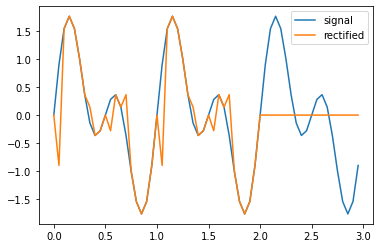

In [19]:
# in s
fs = [
    1, 2
]

# over seconds
signal = []

# in s
t = np.arange(0, 3, 0.05)

for f in fs:
    signal.append(np.sin(2 * pi * f * t))


signal = np.array(signal)
print(signal.shape)
collapsed = np.sum(signal, axis=0)
        

rectified = rectifier(collapsed, kernel_size=20)

plt.plot(t, collapsed, label="signal")
plt.plot(t, rectified, label="rectified")
plt.legend()


-6.123233995736766e-16